# GRIP @ The Sparks Foundation.

# Task 3:- Exploratory Data Analysis - Retail
### As a business manager, try to find out the weak areas where you can work to make more profit. 
### What all business problems you can derive by exploring the data? 

# Author:- Siddhid Gopujkar

#### import necessary libraries and load the dataset.

In [152]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [153]:
#Loading the dataset
df = pd.read_csv("SampleSuperstore.csv")

### Understand the data.

In [154]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [155]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [156]:
df.shape

(9994, 13)

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [158]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [159]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [160]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [161]:
df["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [162]:
df["Country"].unique()

array(['United States'], dtype=object)

In [163]:
df["Region"].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [164]:
df["Segment"].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [165]:
df["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [166]:
df["Sub-Category"].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

### Cleaning the data

In [167]:
#checking for missing values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

###### Now in country column we have only 1 value i.e United States, so removing Country column will not affect our data and I think Postal codes are not necessary for the evaluation so we can delete these columns. 

In [168]:
cdf = df.drop(["Country","Postal Code"], axis =1 )

In [169]:
cdf.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Relationship Analysis

In [170]:
corr = cdf.corr()

<AxesSubplot:>

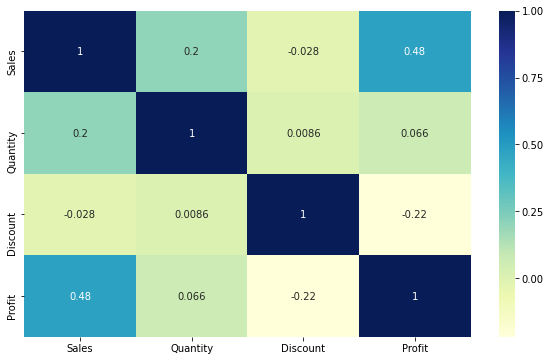

In [171]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="YlGnBu")

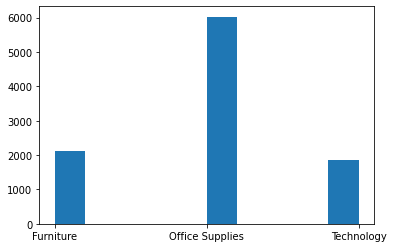

In [172]:
plt.hist(cdf["Category"])
plt.show()

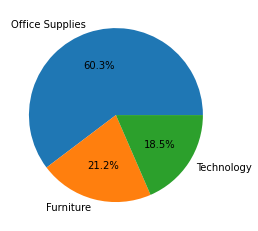

In [173]:
plt.pie(cdf['Category'].value_counts(), labels=cdf["Category"].value_counts().index,autopct='%1.1f%%')
plt.show()

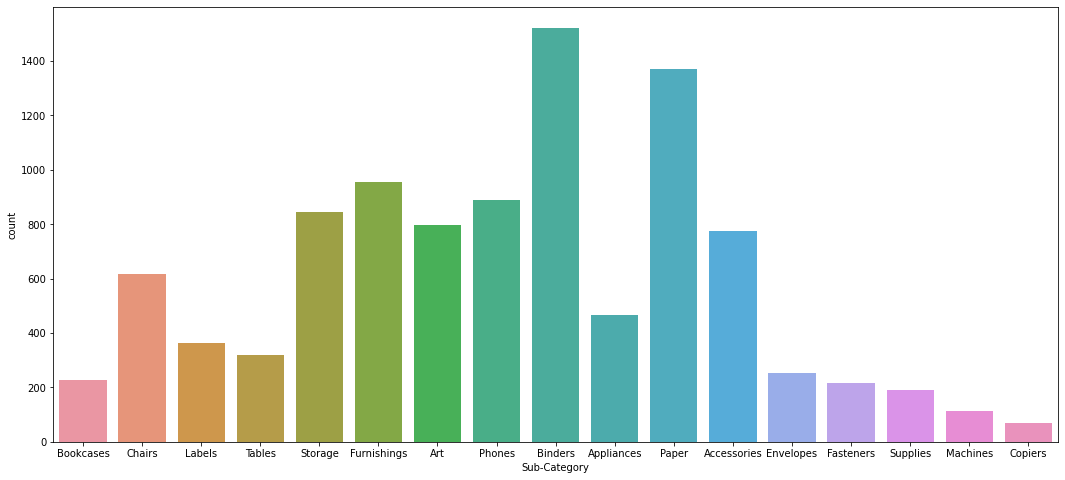

In [174]:
plt.figure(figsize=(18,8))
sns.countplot(x= "Sub-Category",data = cdf)
plt.show()

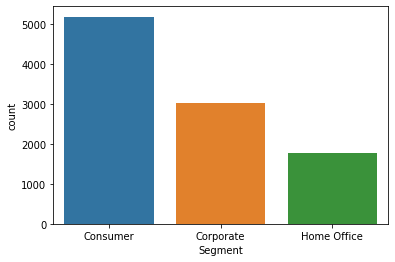

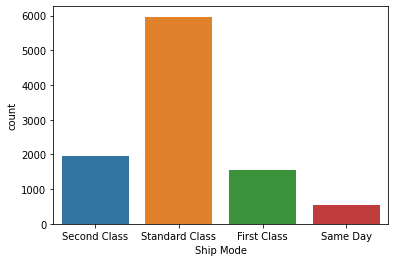

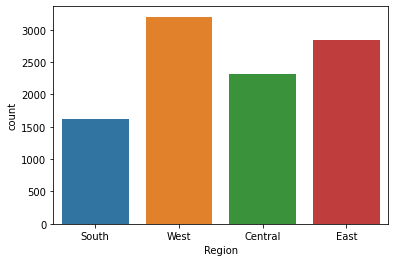

In [175]:
plt.figure().add_subplot(1,1,1)
sns.countplot("Segment",data=cdf)
plt.figure().add_subplot(1,1,1)
sns.countplot("Ship Mode",data=cdf)
plt.figure().add_subplot(1,1,1)
sns.countplot("Region",data=cdf)
plt.show()

In [176]:
#sorted values of profit in assending order for different states.
sp=cdf.groupby(by='State')['Profit'].sum().sort_values(ascending=True)

<AxesSubplot:xlabel='State'>

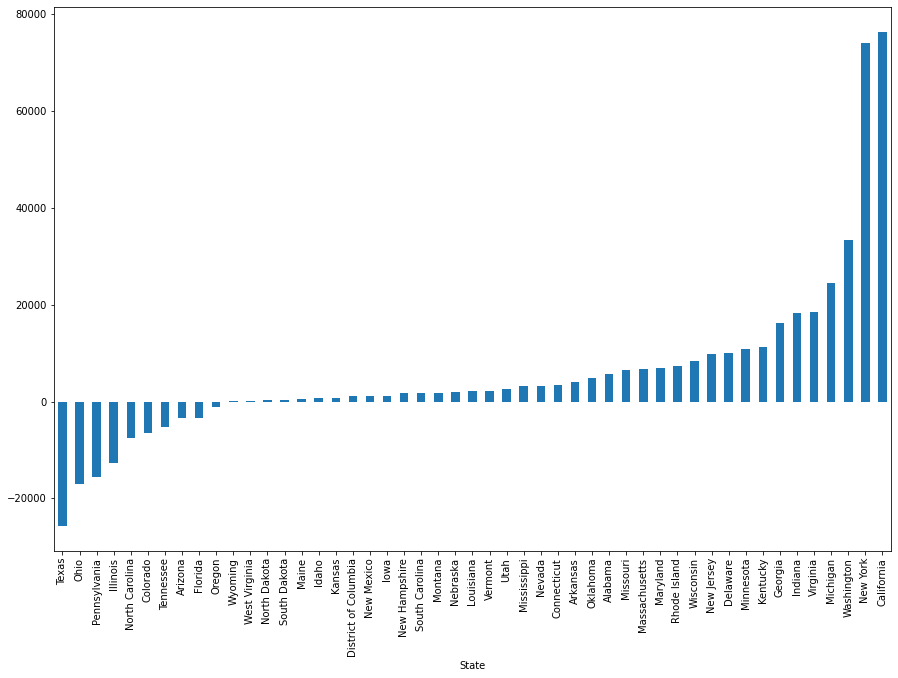

In [177]:
# profit vs state
plt.figure(figsize=(15,10))
sp.plot(kind ="bar")

<AxesSubplot:xlabel='State'>

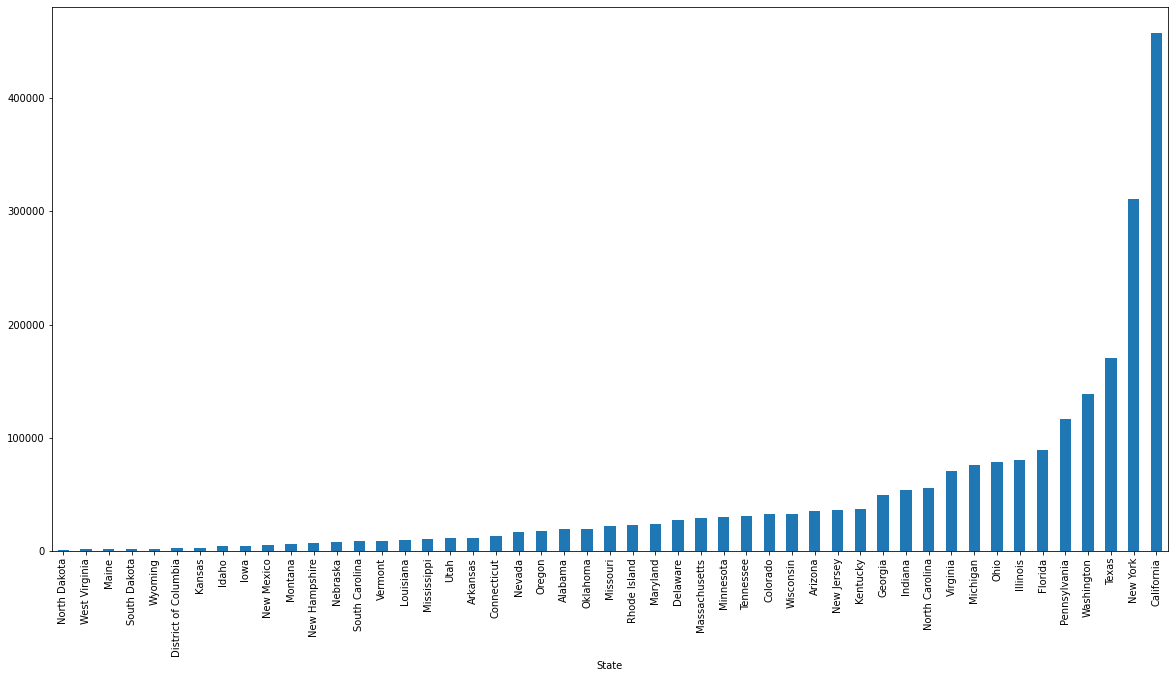

In [178]:
# Sales vs State
plt.figure(figsize=(20,10))
cdf.groupby(by='State')['Sales'].sum().sort_values(ascending=True).plot(kind='bar')

### maximum Sales and Profit is in California state. Another thing to notice is that Texas state is in top 3 in terms of sales but it has the lowest profit i.e maximum loss

In [179]:
hp =cdf[cdf['Profit'] > 3000]

<AxesSubplot:xlabel='State'>

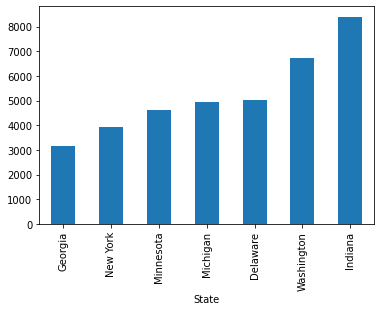

In [199]:
# HIgh profit vs state
hp.groupby(by='State')['Profit'].sum().sort_values().plot(kind="bar")

<AxesSubplot:xlabel='City'>

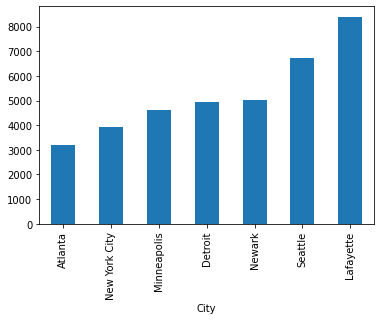

In [198]:
# city vs profit
hp.groupby(by='City')['Profit'].sum().sort_values().plot(kind="bar")

<AxesSubplot:xlabel='Profit', ylabel='Discount'>

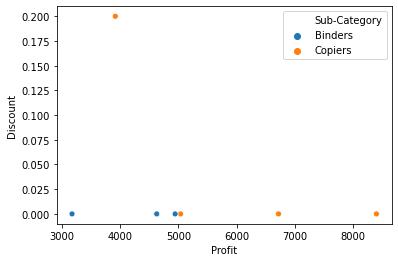

In [217]:
sns.scatterplot("Profit","Discount",hue="Sub-Category",data=hp)

## We can work on the above areas where the profit is high.

In [181]:
loss = cdf[cdf['Profit']< -1000]
loss.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
27,Standard Class,Consumer,Philadelphia,Pennsylvania,East,Furniture,Bookcases,3083.430,7,0.5,-1665.0522
165,Standard Class,Consumer,San Antonio,Texas,Central,Technology,Machines,8159.952,8,0.4,-1359.9920
683,Same Day,Corporate,Burlington,North Carolina,South,Technology,Machines,7999.980,4,0.5,-3839.9904
1199,Standard Class,Consumer,Houston,Texas,Central,Office Supplies,Binders,1088.792,4,0.8,-1850.9464
1803,Second Class,Consumer,Philadelphia,Pennsylvania,East,Office Supplies,Supplies,4663.736,7,0.2,-1049.3406


<AxesSubplot:xlabel='State'>

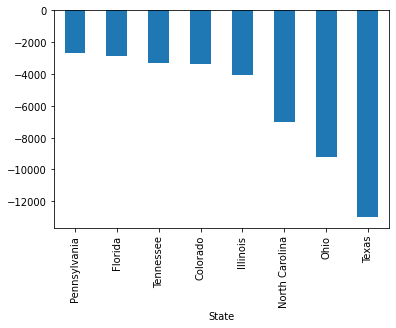

In [187]:
# lowest profit(max loss) vs state 
loss.groupby(by='State')['Profit'].sum().sort_values(ascending=False).plot(kind="bar")

<AxesSubplot:xlabel='Sub-Category', ylabel='count'>

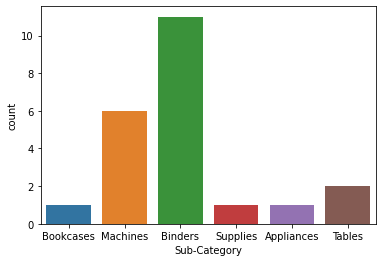

In [185]:
# plt.figure(figsize=(20,10))
sns.countplot('Sub-Category',data=loss)

<AxesSubplot:xlabel='Profit', ylabel='Sales'>

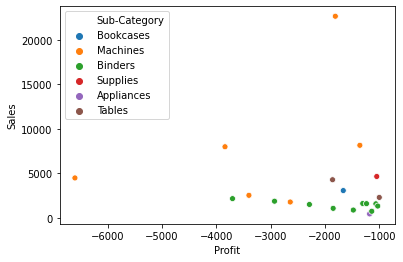

In [196]:
# plt.figure(figsize=(20,10))
sns.scatterplot("Profit","Sales",hue="Sub-Category",data=loss)

### Here We can conclude that the sales of Binders and Machines is high in loss making areas. 

<AxesSubplot:xlabel='Profit', ylabel='Discount'>

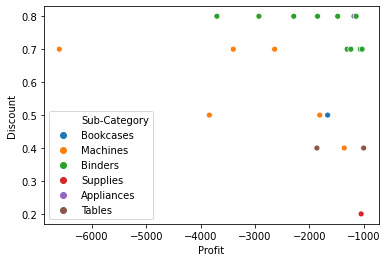

In [216]:
sns.scatterplot("Profit","Discount",hue="Sub-Category",data=loss)

### We can try reducing some Discount in these areas to increase Profit.

 ### Some Of the States With Highest Profit are as follows

In [204]:
hp['State'].unique()

array(['Georgia', 'New York', 'Minnesota', 'Delaware', 'Indiana',
       'Washington', 'Michigan'], dtype=object)

### Some Of the Cities With Highest Profit are as follows

In [205]:
hp["City"].unique()

array(['Atlanta', 'New York City', 'Minneapolis', 'Newark', 'Lafayette',
       'Seattle', 'Detroit'], dtype=object)

###  Some Of the States With lowest Profit are as follows

In [206]:
loss['State'].unique()

array(['Pennsylvania', 'Texas', 'North Carolina', 'Florida', 'Illinois',
       'Colorado', 'Ohio', 'Tennessee'], dtype=object)

###  Some Of the Cities With Highest Profit are as follows

In [209]:
loss['City'].unique()

array(['Philadelphia', 'San Antonio', 'Burlington', 'Houston',
       'Jacksonville', 'Chicago', 'Louisville', 'Newark', 'Clarksville',
       'Knoxville', 'Miami', 'Lancaster', 'Memphis', 'Dallas', 'Concord'],
      dtype=object)

# Thankyou. 